# 🎬 Cine Pulse 2023: Unveiling Global Cinema Trends

Welcome to the 2023 analysis of the global cinema landscape. In this notebook, we explore key patterns, trends, and insights about movie visits, costs, and preferences worldwide.

Our goal is to tell a story using data — helping stakeholders understand where the film industry stands, what drives audiences, and what opportunities lie ahead.

## 🔍 Objectives

- Explore cinema attendance patterns globally in 2023
- Offer actionable insights for studios, distributors, or policy-makers


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re
!pip install wordcloud
from wordcloud import WordCloud

## 🧼 Step 1: Data Loading and Cleaning

We start by importing the dataset and performing basic cleaning tasks — checking for null values, correcting data types, and removing inconsistencies. A clean dataset is crucial for trustworthy insights.


In [13]:
df = pd.read_csv('moviesdataset_2023.csv')
df.head()

,Unnamed: 0,name,rating,votes,runtime,genre,description
0,0,Oppenheimer,8.4,"565,499",180 min,"['Biography, Drama, History']",['The story of American scientist J. Robert Op...
1,1,Sound of Freedom,7.7,"91,802",131 min,"['Biography, Crime, Drama']",['The incredible true story of a former govern...
2,2,Saltburn,7.3,"38,572",131 min,"['Comedy, Drama, Thriller']","[""A student at Oxford University finds himself..."
3,3,Tetris,7.4,"75,645",118 min,"['Biography, Drama, History']","[""The story of how one of the world's most pop..."
4,4,Jesus Revolution,7.1,"12,613",120 min,['Drama'],['The true story of a national spiritual awake...


In [14]:
df.isnull().sum()

,0
Unnamed: 0,0
name,0
rating,2
votes,2
runtime,2
genre,0
description,0


In [15]:
# delete useless columns
df = df.drop('Unnamed: 0', axis=1)

In [16]:
df['rating'] = df['rating'].replace('none', np.nan)
df['rating'] = df['rating'].astype(float)
df['runtime'] = df['runtime'].str.replace(' min', '').astype(float).astype('Int64')
df['votes'] = df['votes'].str.replace(',', '').astype(float).astype('Int64')

In [18]:
rating_mean = df['rating'].mean()
df['rating'] = df['rating'].fillna(rating_mean)

votes_median = df['votes'].median()
df['votes'] = df['votes'].fillna(int(votes_median))

runtime_median = df['runtime'].median()
df['runtime'] = df['runtime'].fillna(int(runtime_median))
df.isnull().sum()

,0
name,0
rating,0
votes,0
runtime,0
genre,0
description,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         100 non-null    object 
 1   rating       100 non-null    float64
 2   votes        100 non-null    Int64  
 3   runtime      100 non-null    Int64  
 4   genre        100 non-null    object 
 5   description  100 non-null    object 
dtypes: Int64(2), float64(1), object(3)
memory usage: 5.0+ KB


In [20]:
df.head()

,name,rating,votes,runtime,genre,description
0,Oppenheimer,8.4,565499,180,"['Biography, Drama, History']",['The story of American scientist J. Robert Op...
1,Sound of Freedom,7.7,91802,131,"['Biography, Crime, Drama']",['The incredible true story of a former govern...
2,Saltburn,7.3,38572,131,"['Comedy, Drama, Thriller']","[""A student at Oxford University finds himself..."
3,Tetris,7.4,75645,118,"['Biography, Drama, History']","[""The story of how one of the world's most pop..."
4,Jesus Revolution,7.1,12613,120,['Drama'],['The true story of a national spiritual awake...


## 📊 Step 2: Exploratory Data Analysis

Let’s begin exploring the dataset to get a sense of how cinema behaved in 2023.

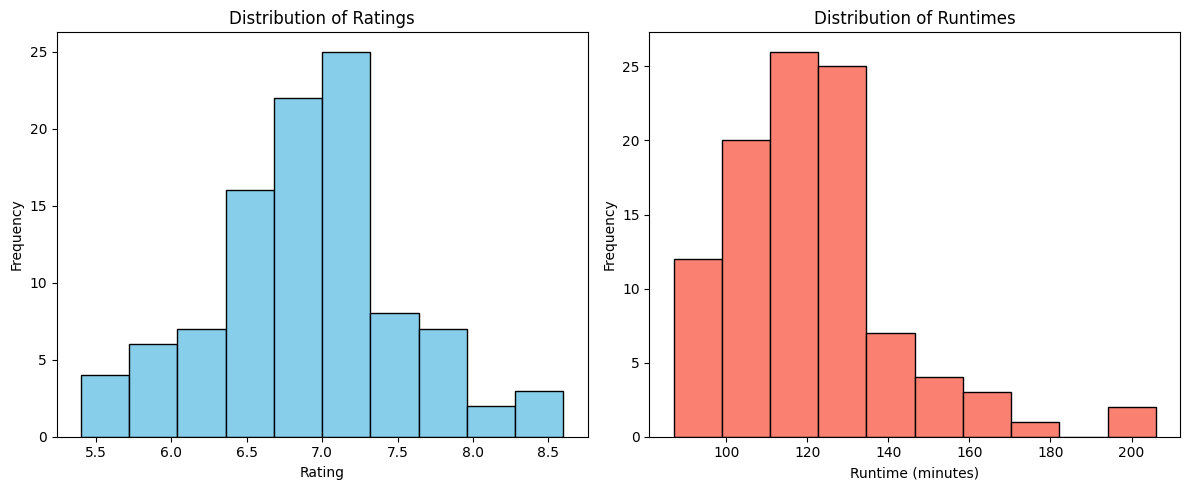

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['runtime'], bins=10, color='salmon', edgecolor='black')
plt.title('Distribution of Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [36]:
df.describe()

,rating,votes,runtime
count,100.000000,100.0,100.0
mean,6.885567,76503.97,121.67
std,0.627644,94535.263156,22.419803
min,5.400000,471.0,87.0
25%,6.500000,14981.0,105.0
50%,6.900000,50755.0,119.0
75%,7.200000,101112.25,133.0
max,8.600000,565499.0,206.0


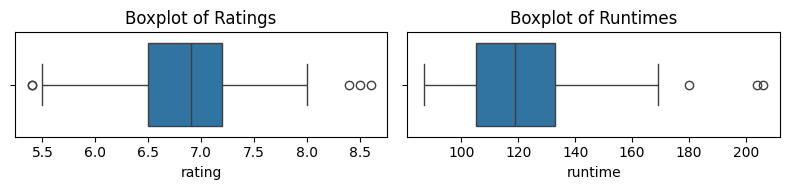

In [24]:
plt.figure(figsize=(8, 2))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['rating'])
plt.title('Boxplot of Ratings')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['runtime'])
plt.title('Boxplot of Runtimes')

plt.tight_layout()
plt.show()

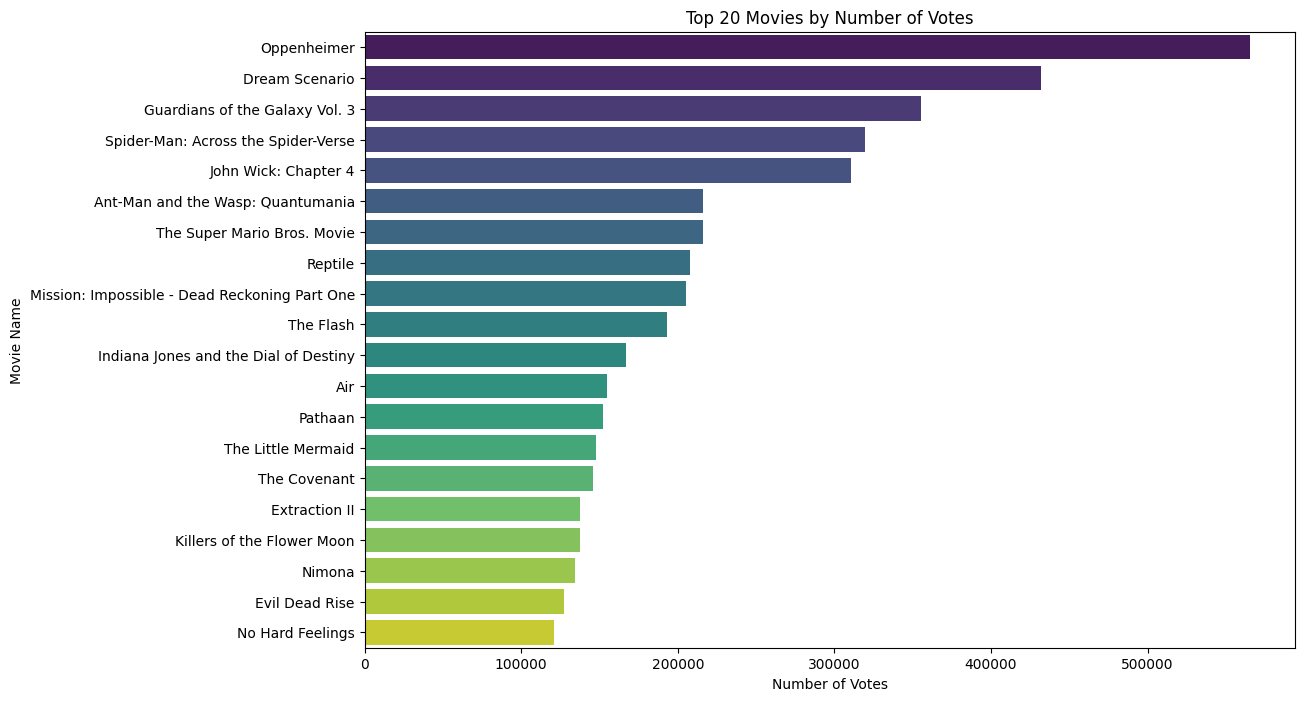

In [26]:
top_20_voted = df.sort_values(by='votes', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='votes', y='name', data=top_20_voted, hue='name', palette='viridis', legend=False)
plt.title('Top 20 Movies by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Movie Name')
plt.show()

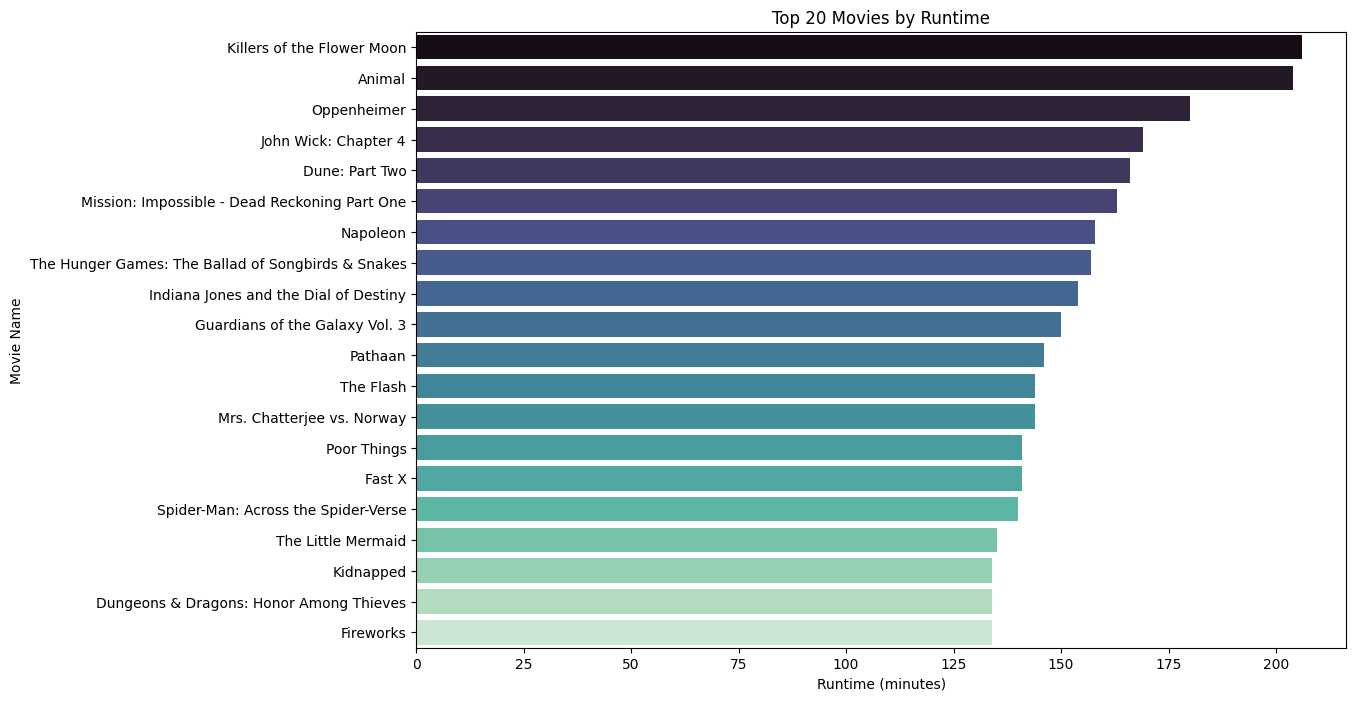

In [28]:
top_20_runtime = df.sort_values(by='runtime', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='runtime', y='name', data=top_20_runtime, hue='name', palette='mako', legend=False)
plt.title('Top 20 Movies by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Movie Name')
plt.show()

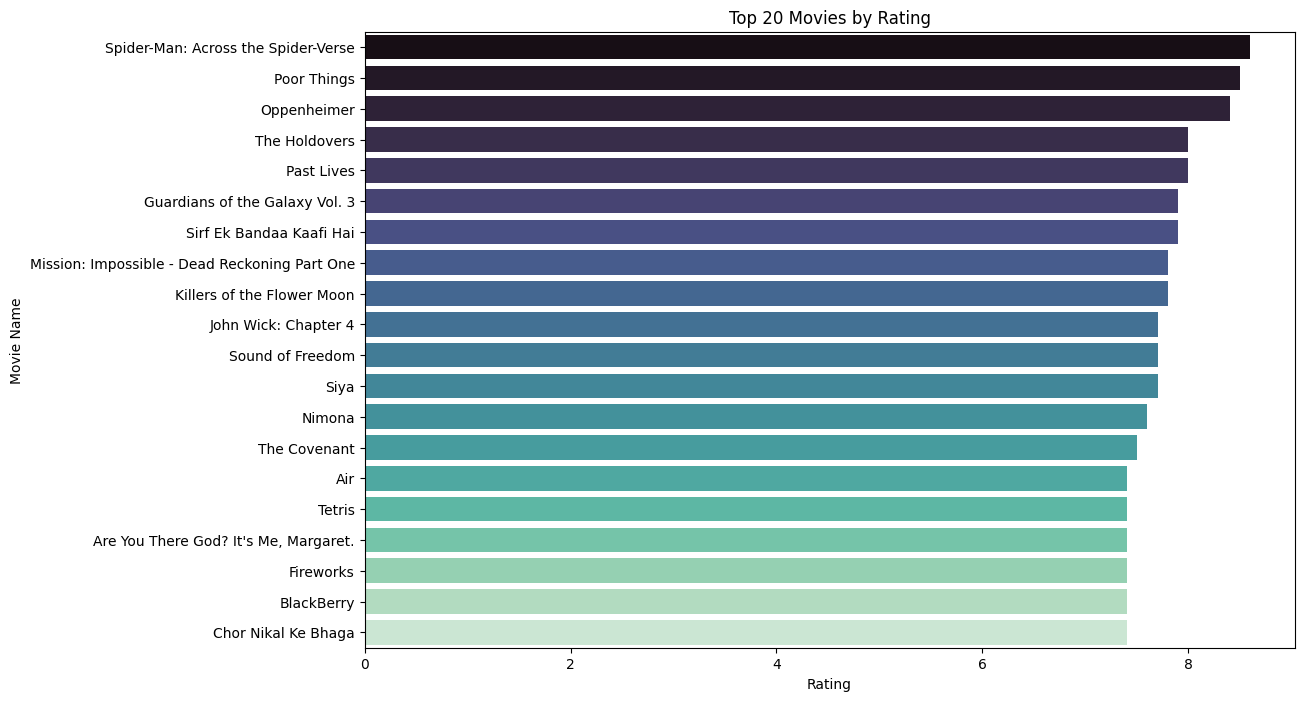

In [31]:
top_20_rating = df.sort_values(by='rating', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='name', data=top_20_rating, hue='name', palette='mako', legend=False)
plt.title('Top 20 Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.show()

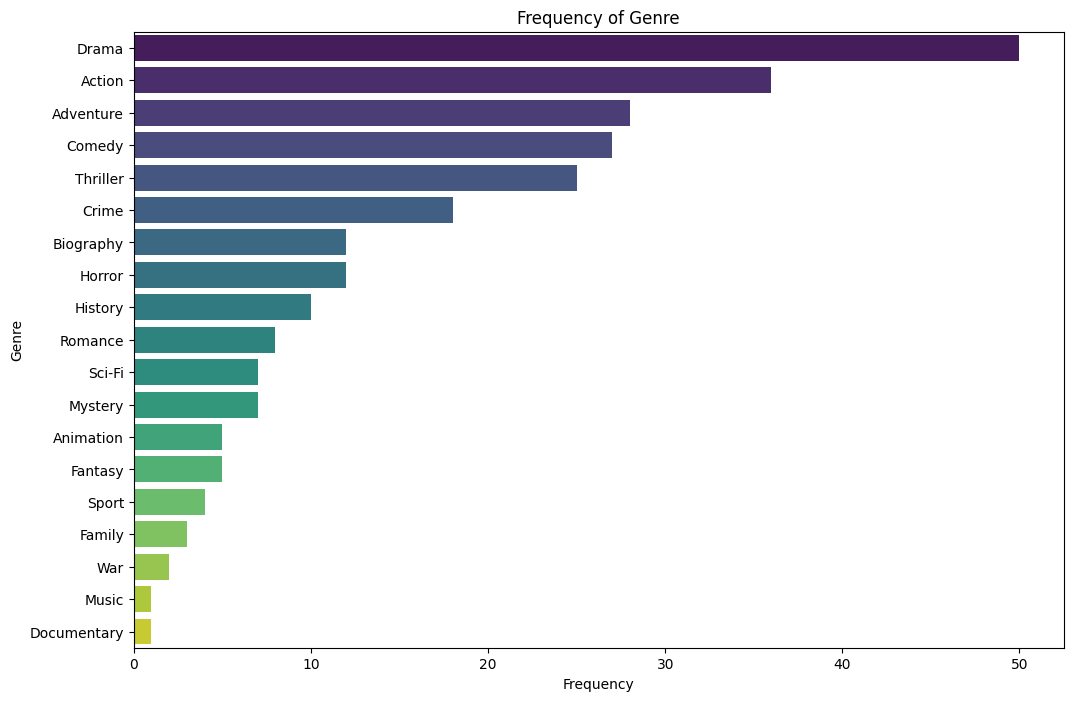

In [35]:
# Get all genres as a single string
all_genres = ' '.join(df['genre'].astype(str))

# Find all words, including those with hyphens
words = re.findall(r'[\w-]+', all_genres)

# Count the words
word_counts = Counter(words)

# Create a DataFrame from the word counts for easy plotting
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=word_counts_df, hue='Genre', palette='viridis', legend=False)
plt.title('Frequency of Genre')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()

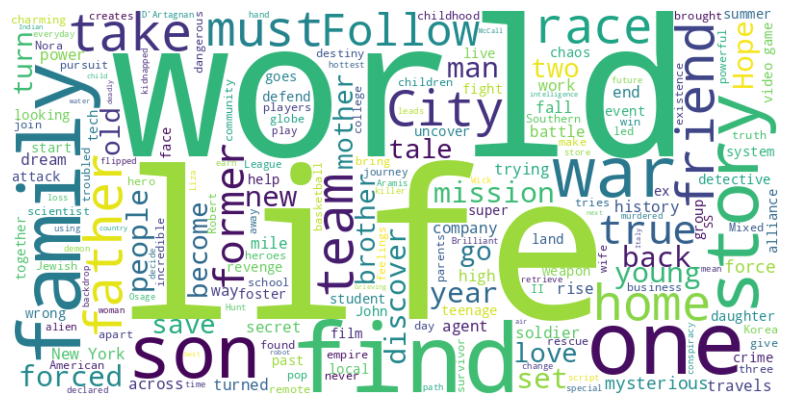

In [37]:
# Join all descriptions into a single string
text = ' '.join(df['description'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 💡 Key Insights

Based on our Exploratory Data Analysis, we identified several meaningful patterns in audience preferences and movie ratings:

- 🎭 **Drama and Action** genres consistently attract the most viewers, indicating a strong emotional and adrenaline-driven engagement from audiences.
- ⭐ **Certain films received significantly higher ratings** than others, suggesting that quality, storytelling, or star power play a crucial role in audience satisfaction.
- 🌍 **Themes related to Life, the World, and Family** resonate deeply with viewers, reflecting a preference for meaningful and relatable narratives.
